# Sampling

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/winequalityN.csv"
df = pd.read_csv(file_name)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.shape

(6497, 13)

Actual Mean: 10.491801
Sample Mean: 10.500091
Sample Error: -0.008291


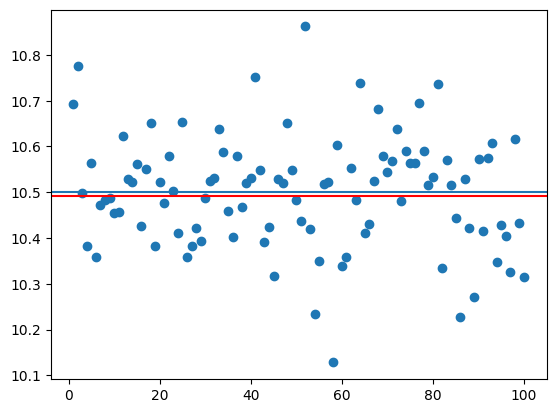

In [ ]:
import pandas as pd

sample_means = []
population_mean = df['alcohol'].mean()
sample_size = 100

for i in range(sample_size):
    # we use the sample function to take n samples, random state is a seed parameter to generate pseudo randomn numbers
    sample = df['alcohol'].sample(sample_size, random_state=i)
    sample_means.append(sample.mean())

plt.scatter(range(1,sample_size+1), sample_means)

# Plots our actual mean
plt.axhline(population_mean, color='red')

# Plots the mean of our sample size
sample_size_mean = np.array(sample_means).mean()
plt.axhline(sample_size_mean)

print("Actual Mean: %2f" % (population_mean))
print("Sample Mean: %2f" % (sample_size_mean))
print("Sample Error: %2f" % (population_mean-sample_size_mean))

# Stratifying Sampling

Taking the average alcohol content of wines based on our sample can be misleading because our dataset contains both red and white wines, and when looking at the proportion, it contains far more white wines.

In [ ]:
df['type'].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

In [ ]:
stratum_white = df[df.type == 'white']
stratum_red = df[df.type == 'red']

In [ ]:
len(stratum_white)

4898

In [ ]:
alcohol_per_wine_type = {}
for stratum, wine_type in [(stratum_white, 'white'), (stratum_red, 'red')]:
  sample = stratum['alcohol'].sample(250, random_state = 0)
  alcohol_per_wine_type[wine_type] = sample.mean()
print(alcohol_per_wine_type)

{'white': 10.610040000011999, 'red': 10.479}
